# 6.7. Componentes de la deformación en coordenadas cilíndricas

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Diego Andrés Alvarez, <daalvarez@unal.edu.co>  | Marzo 15, 2023 | Código inicial |

De acuerdo con la ecuación (<font color='blue'>6.39</font>) y la matriz de transformación $\boldsymbol{T}$ definida en la ecuación (<font color='blue'>6.6</font>), las ecuaciones que transforman las deformaciones de coordenas cilíndricas a coordenadas rectangulares se pueden calcular con el siguiente programa:

In [1]:
from sympy import sin, cos, diff, Function, simplify, symbols, factor, Eq, init_printing, latex, Matrix

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Se definen las variables y funciones simbólicas necesarias:

In [2]:
r, t, z = symbols("r, theta, z")

# se especifica que sr, st, sz, trt, trz y ttz son funciones de r, t y z
er  = Function('varepsilon_r')(r, t, z)
et  = Function('varepsilon_θ')(r, t, z)
ez  = Function('varepsilon_z')(r, t, z)
grt = Function('gamma_rθ')(r, t, z);        ert = grt/2
grz = Function('gamma_rz')(r, t, z);        erz = grz/2
gtz = Function('gamma_θz')(r, t, z);        etz = gtz/2

Se define la matriz de tensiones en coordenadas cilíndricas $\underline{\underline{\boldsymbol{\sigma}}}_{\text{cil}}$:

In [3]:
eps_cil = Matrix([[  er, ert, erz ],
                  [ ert,  et, etz ],                       
                  [ erz, etz,  ez ]])

Se define la matriz de transformación $\boldsymbol{T}$:

In [4]:
T = Matrix([[ cos(t), -sin(t),       0 ],     
            [ sin(t),  cos(t),       0 ],      
            [      0,       0,       1 ]])

Se calcula la matriz de deformaciones $\underline{\underline{\boldsymbol{\varepsilon}}}_{\text{cil}}$ en el sistema de coordenadas especificadas por los vectores definidos en la matriz $\boldsymbol{T}$. Recuerde que $$\underline{\underline{\boldsymbol{\varepsilon}}} = \boldsymbol{T} \underline{\underline{\boldsymbol{\varepsilon}}}_{\text{cil}} \boldsymbol{T}^T.$$

In [5]:
eps = T*eps_cil*T.T            # ecuación (6.39)

Se extraen los términos de la matriz de deformaciones $\underline{\underline{\boldsymbol{\varepsilon}}}$:

In [6]:
ex  = eps[0,0]
ey  = eps[1,1]
ez  = eps[2,2]
gxy = 2*eps[0,1]
gxz = 2*eps[0,2]
gyz = 2*eps[1,2]

Se definen los desplazamientos:

In [7]:
ur = Function("u_r")(r, t, z)
vt = Function("v_θ")(r, t, z)
w  = Function("w")(r, t, z)

# Vector de fuerzas másicas con respecto a la base {rP,tP,zP}
des_cil = Matrix([[ ur ],
                  [ vt ],
                  [ w  ]])

# Se expresa el vector de fuerzas másicas con respecto a la base {i,j,k}
des = T * des_cil

# Se hace la asignación respectiva de los desplazamientos
u, v = des[0], des[1]

In [8]:
# se definen las primeras derivadas
d_dx = lambda f: diff(f,r)*cos(t) - diff(f,t)*sin(t)/r
d_dy = lambda f: diff(f,r)*sin(t) + diff(f,t)*cos(t)/r
d_dz = lambda f: diff(f,z)

Inicialmente, exploremos las ecuaciones que definen las deformaciones en coordenadas rectangulares:
\begin{alignat}{3}
\varepsilon_x &= \frac{\partial u}{\partial x} && \quad \Longrightarrow \quad & \varepsilon_x - \frac{\partial u}{\partial x} &= 0\\
\varepsilon_y &= \frac{\partial v}{\partial y} && \quad \Longrightarrow \quad & \varepsilon_y - \frac{\partial v}{\partial y} &= 0\\
\varepsilon_z &= \frac{\partial w}{\partial z} && \quad \Longrightarrow \quad & \varepsilon_z - \frac{\partial w}{\partial z} &= 0\\
\gamma_{xy} &= \frac{\partial u}{\partial x} + \frac{\partial u}{\partial y} && \quad \Longrightarrow \quad & \gamma_{xy} - \left(\frac{\partial u}{\partial x} + \frac{\partial u}{\partial y}\right) &= 0\\
\gamma_{xz} &= \frac{\partial w}{\partial x} + \frac{\partial u}{\partial z} && \quad \Longrightarrow \quad & \gamma_{xz} - \left(\frac{\partial w}{\partial x} + \frac{\partial u}{\partial z}\right) &= 0\\
\gamma_{yz} &= \frac{\partial w}{\partial z} + \frac{\partial v}{\partial z} && \quad \Longrightarrow \quad & \gamma_{yz} - \left(\frac{\partial w}{\partial z} + \frac{\partial v}{\partial z}\right) &= 0
\end{alignat}

In [9]:
imprimir("", (ex - d_dx(u)).expand().collect([sin(t)**2, cos(t)**2, sin(t)*cos(t)]), " = 0")

<IPython.core.display.Math object>

In [10]:
imprimir("", (ey - d_dy(v)).expand().collect([sin(t)**2, cos(t)**2, sin(t)*cos(t)]), " = 0")

<IPython.core.display.Math object>

In [11]:
imprimir("", (ez - d_dz(w)).expand().collect([sin(t)**2, cos(t)**2, sin(t)*cos(t)]), " = 0")

<IPython.core.display.Math object>

In [12]:
imprimir("", (gxy - (d_dy(u) + d_dx(v))).expand().collect([sin(t)**2, cos(t)**2, 2*sin(t)*cos(t)]), " = 0")

<IPython.core.display.Math object>

In [13]:
imprimir("", (gyz - (d_dz(v) + d_dy(w))).expand().collect([sin(t), cos(t)]), " = 0")

<IPython.core.display.Math object>

In [14]:
imprimir("", (gxz - (d_dz(u) + d_dx(w))).expand().collect([sin(t), cos(t)]), " = 0")

<IPython.core.display.Math object>

Y ahora escribamos las ecuaciones que definen la deformación en coordenadas "rectangulares":

In [15]:
eq1 = Eq(ex,  d_dx(u))
eq2 = Eq(ey,  d_dy(v))
eq3 = Eq(ez,  d_dz(w))
eq4 = Eq(gxy, d_dy(u) + d_dx(v))
eq5 = Eq(gyz, d_dz(v) + d_dy(w))
eq6 = Eq(gxz, d_dz(u) + d_dx(w))

Para despejar los términos comunes entre paréntesis de las ecuaciones anteriores basta evaluar las igualdades en $\sin(\theta)=0$ y $\cos(\theta)=1$:

In [16]:
eq1 =  eq1.subs({sin(t): 0, cos(t): 1})
eq2 = (eq2.subs({sin(t): 0, cos(t): 1})).expand()
eq3 =  eq3.subs({sin(t): 0, cos(t): 1})           # aunque en la ecuación 3 no es necesario ...
eq4 = (eq4.subs({sin(t): 0, cos(t): 1})).expand()
eq5 =  eq5.subs({sin(t): 0, cos(t): 1})
eq6 =  eq6.subs({sin(t): 0, cos(t): 1})

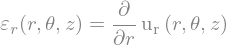

In [17]:
eq1

In [18]:
eq2

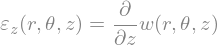

In [19]:
eq3

In [20]:
eq4

In [21]:
eq5

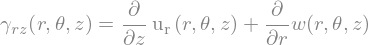

In [22]:
eq6